#Libraries

In [1]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,log_loss,roc_curve,roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

#Loading the extracted features
we have added the gender file to features file

In [2]:
drive.mount('/content/drive')
path = 'drive/MyDrive/features/feature_1.csv'
extracted_data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
features = extracted_data.drop(["gender","Filename"], axis=1)
labels = extracted_data[["gender"]]

Because in the genders they are some persian written tex so we write a code to have a same label for male and female:

In [4]:
for i in range(len(labels['gender'])):
  if (labels['gender'][i] == 'female'):
    labels['gender'][i] = "female"
  else:
    labels['gender'][i] = 'male'

<ipython-input-4-0a0c4211cefc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['gender'][i] = 'male'
<ipython-input-4-0a0c4211cefc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels['gender'][i] = "female"


Using train_test_split we split the train and test data:

In [5]:
features_train, features_test, labels_train, labels_test = train_test_split(features,labels, test_size=0.3,random_state=42)

In [6]:
labels_test1=np.array(labels_test)[:,0]

For testing that if the classes are biased are not we have:

In [7]:
male_test = 0
male_train = 0
female_test = 0
female_train = 0
for label in labels_train['gender']:
  if (label == "female"):
    female_train +=1
  else:
    male_train +=1


for label in labels_test['gender']:
  if (label == 'female'):
    female_test +=1
  else:
    male_test +=1

print('we have {} male samples and {} female samples in our train dataset \nwe have {} male samples and {} female samples in our test dataset'.format(male_train,female_train,male_test,female_test))

we have 3334 male samples and 895 female samples in our train dataset 
we have 1386 male samples and 427 female samples in our test dataset


So our data in train and test is not biased.

#*SVM*

The first classifier that we will use is SVM. We use svm from sklearn and define a model. We fit the model with our features_train and labels_train:

In [8]:
svc = svm.SVC(probability=True)
svc.fit(features_train, labels_train)
labels_pred_svm = svc.predict(features_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Evaluating the model:
For evaluating the model we have used the parameters below and also plotting the confusion matrix is one of the ways of evaluation:
-Accuracy
-Error

Accuracy of SVM Classifier: 76.45 %
Error of SVM Classifier: 27.55 %
F1-score of SVM Classifier: 86.65 %
Recall of SVM Classifier: 100.00 %
Percision of SVM Classifier: 76.45 %
<function confusion_matrix at 0x7bef1f884280>


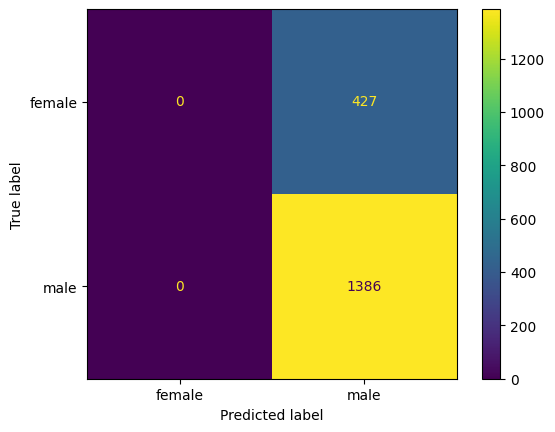

In [65]:
cm_svm=confusion_matrix(labels_test,labels_pred_svm)

le = preprocessing.LabelEncoder()
labels_pred_svm1=np.array(labels_pred_svm)
labels_pred_svm1=le.fit_transform(labels_pred_svm1)

accuracy_svm = accuracy_score(labels_test, labels_pred_svm) * 100
error_svm = log_loss(labels_test1,labels_pred_svm1)
F1_score_svm = f1_score(labels_test, labels_pred_svm ,pos_label="male") * 100
recall_svm = recall_score(labels_test, labels_pred_svm,pos_label="male")* 100
precision_svm = precision_score(labels_test, labels_pred_svm,pos_label="male") * 100

print("Accuracy of SVM Classifier: {:.2f} %".format(accuracy_svm))
print("Error of SVM Classifier: {:.2f} %" .format(error_svm))
print("F1-score of SVM Classifier: {:.2f} %".format(F1_score_svm))
print("Recall of SVM Classifier: {:.2f} %".format(recall_svm))
print("Percision of SVM Classifier: {:.2f} %".format(precision_svm))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                               display_labels=svc.classes_)
disp.plot()
print(confusion_matrix)

In [11]:
def plot_ROC(y_test, y_pred,name_of_class):
    lb = preprocessing.LabelBinarizer()
    y_test = lb.fit_transform(y_test)
    y_pred = lb.fit_transform(y_pred)
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    fig,axs = plt.subplots(1,1,figsize=(6,6))
    axs.spines['right'].set_visible(False)
    axs.spines['top'  ].set_visible(False)
    axs.plot(fpr, tpr, label=name_of_class)
    axs.text(0.2,.6,'Area = %0.2f' % logit_roc_auc,size=15)
    axs.plot([0, 1], [0, 1],'r--')
    axs.set_xlim([0.0, 1.0])
    axs.set_ylim([0.0, 1.05])
    axs.set_xlabel('False Positive Rate(FPR)')
    axs.set_ylabel('True Positive Rate(TPR)')
    axs.set_title('Receiver Operating Characteristic (ROC)')
    axs.legend(loc="lower right")
    plt.show()

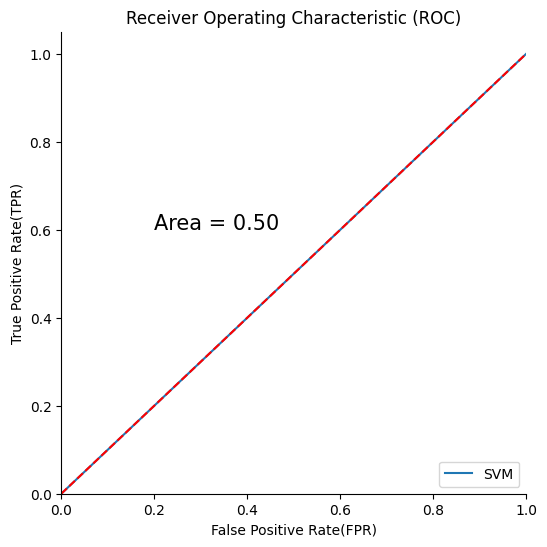

In [12]:
plot_ROC(labels_test, labels_pred_svm,'SVM')

#*Desicion Tree*
The second classifier that we want to classify our data is Desicion tree. Like the previous classifier we define a model and fit the train and test datsets:

In [13]:
dt = DecisionTreeClassifier(min_samples_leaf=10)
dt.fit(features_train, labels_train)

DecisionTreeClassifier(min_samples_leaf=10)

In [14]:
labels_pred_dt = dt.predict(features_test)

Accuracy of Desicion Tree Classifier: 90.02 %
Error of Desicion Tree Classifier: 3.60 %
F1-score of Desicion Tree Classifier: 93.55 %
Recall of Desicion Tree Classifier: 94.73 %
Percision of Desicion Tree Classifier: 92.40 %
<function confusion_matrix at 0x7bef1f884280>


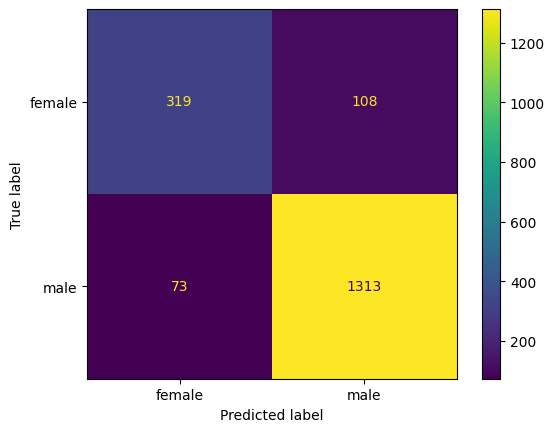

In [15]:
cm_dt=confusion_matrix(labels_test,labels_pred_dt)


labels_pred_dt1=np.array(labels_pred_dt)
labels_pred_dt1=le.fit_transform(labels_pred_dt1)


accuracy_dt = accuracy_score(labels_test, labels_pred_dt ) * 100
error_dt = log_loss(labels_test1,labels_pred_dt1)
F1_score_dt = f1_score(labels_test, labels_pred_dt ,pos_label="male") * 100
recall_dt = recall_score(labels_test, labels_pred_dt,pos_label="male")* 100
precision_dt = precision_score(labels_test, labels_pred_dt,pos_label="male") * 100

print("Accuracy of Desicion Tree Classifier: {:.2f} %".format(accuracy_dt))
print("Error of Desicion Tree Classifier: {:.2f} %" .format(error_dt))
print("F1-score of Desicion Tree Classifier: {:.2f} %".format(F1_score_dt))
print("Recall of Desicion Tree Classifier: {:.2f} %".format(recall_dt))
print("Percision of Desicion Tree Classifier: {:.2f} %".format(precision_dt))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt,
                               display_labels=dt.classes_)
disp.plot()
print(confusion_matrix)

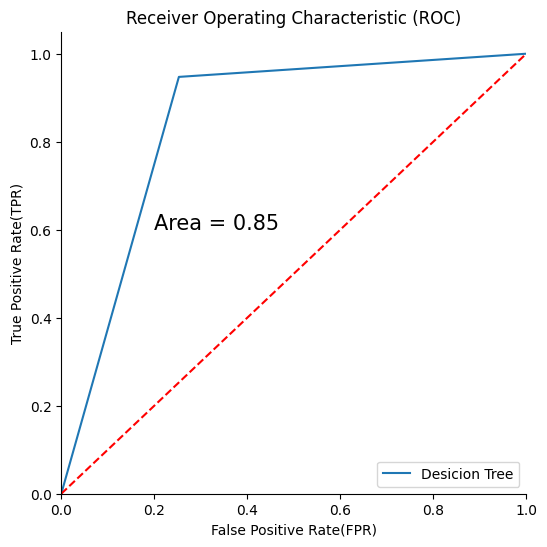

In [16]:
plot_ROC(labels_test, labels_pred_dt,'Desicion Tree')

#*KNN*
The third classifier is KNN:

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [18]:
knn.fit(features_train,labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [19]:
labels_pred_knn = knn.predict(features_test)

Accuracy of KNN Classifier: 90.68 %
Error of KNN Classifier: 3.36 %
F1-score of KNN Classifier: 93.98 %
Recall of KNN Classifier: 95.24 %
Percision of KNN Classifier: 92.76 %
<function confusion_matrix at 0x7bef1f884280>


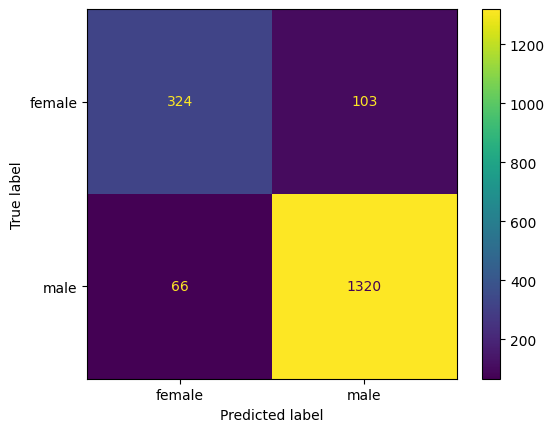

In [20]:
cm_knn=confusion_matrix(labels_test,labels_pred_knn)


labels_pred_knn1=np.array(labels_pred_knn)
labels_pred_knn1=le.fit_transform(labels_pred_knn1)


accuracy_knn = accuracy_score(labels_test, labels_pred_knn) * 100
error_knn = log_loss(labels_test1,labels_pred_knn1)
F1_score_knn = f1_score(labels_test, labels_pred_knn ,pos_label="male") * 100
recall_knn = recall_score(labels_test, labels_pred_knn,pos_label="male")* 100
precision_knn = precision_score(labels_test, labels_pred_knn,pos_label="male") * 100

print("Accuracy of KNN Classifier: {:.2f} %".format(accuracy_knn))
print("Error of KNN Classifier: {:.2f} %" .format(error_knn))
print("F1-score of KNN Classifier: {:.2f} %".format(F1_score_knn))
print("Recall of KNN Classifier: {:.2f} %".format(recall_knn))
print("Percision of KNN Classifier: {:.2f} %".format(precision_knn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                               display_labels=knn.classes_)
disp.plot()
print(confusion_matrix)

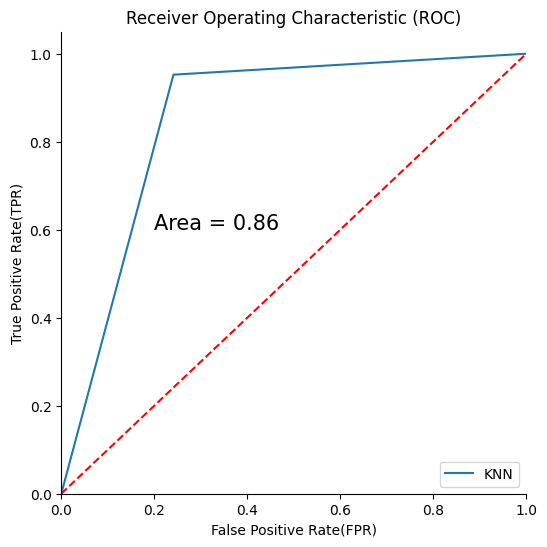

In [21]:
plot_ROC(labels_test, labels_pred_knn,'KNN')

For making the models more accurate we make some changes and see if there will be any change in the accuracy:

#***Normalization***

In [22]:
scaler =QuantileTransformer()
normalized_features=scaler.fit_transform(features)

In [23]:
normalized_features_train, normalized_features_test, normalized_labels_train, normalized_labels_test = train_test_split(normalized_features, labels, test_size=0.3,random_state=47)

In [24]:
normalized_labels_test1=np.array(normalized_labels_test)[:,0]

#*Normalized_SVM*

In [25]:
svm_n = svm.SVC()
svm_n.fit(normalized_features_train, normalized_labels_train)
normalized_labels_pred_svm = svm_n.predict(normalized_features_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Normalized SVM Classifier: 98.07 %
Error of Normalized SVM Classifier: 0.70 %
F1-score of Normalized SVM Classifier: 98.77 %
Recall of Normalized SVM Classifier: 99.36 %
Percision of Normalized SVM Classifier: 98.18 %
<function confusion_matrix at 0x7bef1f884280>


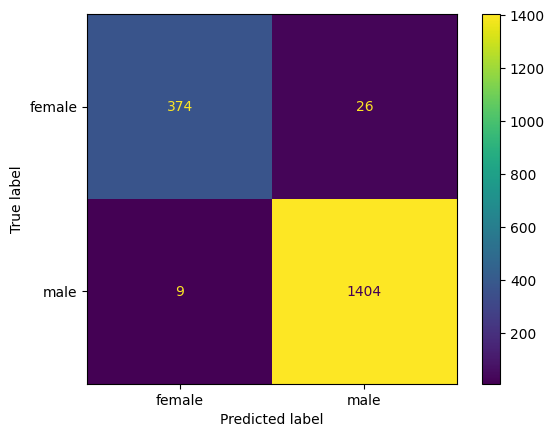

In [26]:
cm_svm_n=confusion_matrix(normalized_labels_test,normalized_labels_pred_svm)

normalized_labels_pred_svm1=np.array(normalized_labels_pred_svm)
normalized_labels_pred_svm1=le.fit_transform(normalized_labels_pred_svm1)

accuracy_svm_n = accuracy_score(normalized_labels_test, normalized_labels_pred_svm ) * 100
error_svm_n = log_loss(normalized_labels_test1,normalized_labels_pred_svm1)
F1_score_svm_n = f1_score(normalized_labels_test, normalized_labels_pred_svm ,pos_label="male") * 100
recall_svm_n = recall_score(normalized_labels_test, normalized_labels_pred_svm,pos_label="male")* 100
precision_svm_n = precision_score(normalized_labels_test, normalized_labels_pred_svm,pos_label="male") * 100

print("Accuracy of Normalized SVM Classifier: {:.2f} %".format(accuracy_svm_n))
print("Error of Normalized SVM Classifier: {:.2f} %" .format(error_svm_n))
print("F1-score of Normalized SVM Classifier: {:.2f} %".format(F1_score_svm_n))
print("Recall of Normalized SVM Classifier: {:.2f} %".format(recall_svm_n))
print("Percision of Normalized SVM Classifier: {:.2f} %".format(precision_svm_n))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm_n,
                               display_labels=svm_n.classes_)
disp.plot()
print(confusion_matrix)

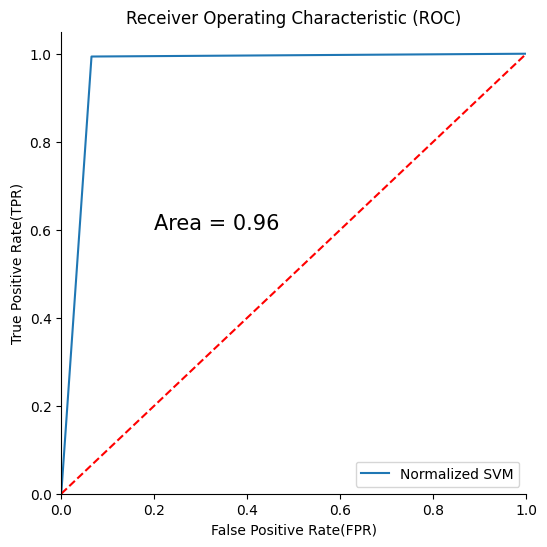

In [27]:
plot_ROC(normalized_labels_test, normalized_labels_pred_svm,'Normalized SVM')

#*Normalized_Desicion_Tree*

In [28]:
dt_n = DecisionTreeClassifier(min_samples_leaf=10)
dt_n.fit(normalized_features_train, normalized_labels_train)
normalized_labels_pred_dt = dt_n.predict(normalized_features_test)


Accuracy of Normalized Desicion Tree Classifier: 90.51 %
Error of Normalized Desicion Tree Classifier: 3.42 %
F1-score of Normalized Desicion Tree Classifier: 93.94 %
Recall of Normalized Desicion Tree Classifier: 94.27 %
Percision of Normalized Desicion Tree Classifier: 93.61 %
<function confusion_matrix at 0x7bef1f884280>


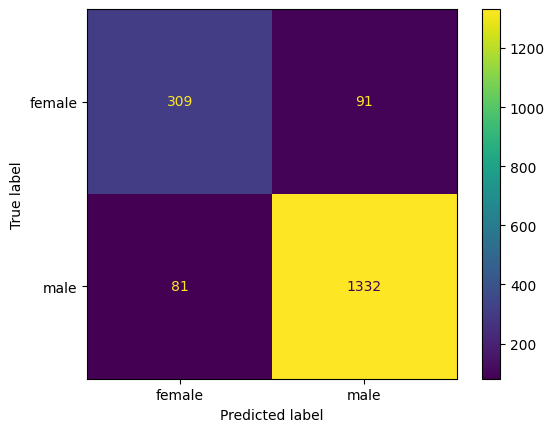

In [29]:
cm_dt_n=confusion_matrix(normalized_labels_test,normalized_labels_pred_dt)

normalized_labels_pred_dt1=np.array(normalized_labels_pred_dt)
normalized_labels_pred_dt1=le.fit_transform(normalized_labels_pred_dt1)

accuracy_dt_n = accuracy_score(normalized_labels_test, normalized_labels_pred_dt ) * 100
error_dt_n = log_loss(normalized_labels_test1,normalized_labels_pred_dt1)
F1_score_dt_n = f1_score(normalized_labels_test, normalized_labels_pred_dt ,pos_label="male") * 100
recall_dt_n = recall_score(normalized_labels_test, normalized_labels_pred_dt,pos_label="male")* 100
precision_dt_n = precision_score(normalized_labels_test, normalized_labels_pred_dt,pos_label="male") * 100

print("Accuracy of Normalized Desicion Tree Classifier: {:.2f} %".format(accuracy_dt_n))
print("Error of Normalized Desicion Tree Classifier: {:.2f} %" .format(error_dt_n))
print("F1-score of Normalized Desicion Tree Classifier: {:.2f} %".format(F1_score_dt_n))
print("Recall of Normalized Desicion Tree Classifier: {:.2f} %".format(recall_dt_n))
print("Percision of Normalized Desicion Tree Classifier: {:.2f} %".format(precision_dt_n))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt_n,
                               display_labels=dt_n.classes_)
disp.plot()
print(confusion_matrix)

#*Normalized_KNN*

In [30]:
knn_n = KNeighborsClassifier(n_neighbors = 5)

In [31]:
knn_n.fit(normalized_features_train,normalized_labels_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [32]:
normalized_labels_pred_knn = knn_n.predict(normalized_features_test)

Accuracy of Normalized KNN Classifier: 98.84 %
Error of Normalized KNN Classifier: 0.42 %
F1-score of Normalized KNN Classifier: 99.26 %
Recall of Normalized KNN Classifier: 99.58 %
Percision of Normalized KNN Classifier: 98.95 %
<function confusion_matrix at 0x7bef1f884280>


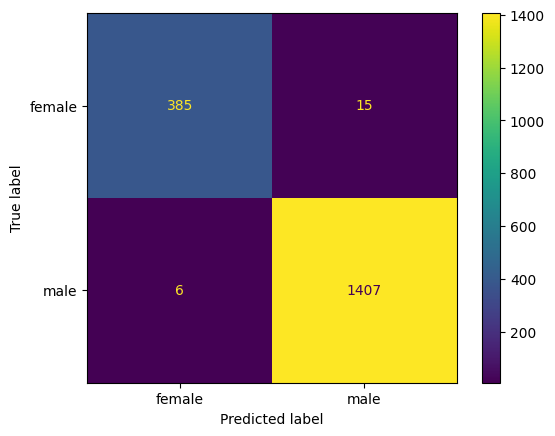

In [33]:
cm_knn_n=confusion_matrix(normalized_labels_test,normalized_labels_pred_knn)

normalized_labels_pred_knn1=np.array(normalized_labels_pred_knn)
normalized_labels_pred_knn1=le.fit_transform(normalized_labels_pred_knn1)

accuracy_knn_n = accuracy_score(normalized_labels_test, normalized_labels_pred_knn ) * 100
error_knn_n = log_loss(normalized_labels_test1,normalized_labels_pred_knn1)
F1_score_knn_n = f1_score(normalized_labels_test, normalized_labels_pred_knn ,pos_label="male") * 100
recall_knn_n = recall_score(normalized_labels_test, normalized_labels_pred_knn,pos_label="male")* 100
precision_knn_n = precision_score(normalized_labels_test, normalized_labels_pred_knn,pos_label="male") * 100

print("Accuracy of Normalized KNN Classifier: {:.2f} %".format(accuracy_knn_n))
print("Error of Normalized KNN Classifier: {:.2f} %" .format(error_knn_n))
print("F1-score of Normalized KNN Classifier: {:.2f} %".format(F1_score_knn_n))
print("Recall of Normalized KNN Classifier: {:.2f} %".format(recall_knn_n))
print("Percision of Normalized KNN Classifier: {:.2f} %".format(precision_knn_n))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_n,
                               display_labels=knn_n.classes_)
disp.plot()
print(confusion_matrix)

As we can see normalization has improved SVM and KNN models but not desicion tree. For improving desicion tree we will use ensemble learning.
We will use random forest and boosting for desicion tree

#***Random Forest***

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [35]:
rnd_clf = RandomForestClassifier(n_estimators=500, min_samples_leaf=10, random_state=42)
rnd_clf.fit(features_train, labels_train)

labels_pred_rf = rnd_clf.predict(features_test)

<ipython-input-35-9aef50c7a145>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd_clf.fit(features_train, labels_train)


Accuracy of Random Forest Classifier: 94.76 % 
Error of Random Forest Classifier: 1.89 % 
F1-score of Random Forest Classifier: 96.68 %
Recall of Random Forest Classifier: 99.78 %
Percision of Random Forest Classifier: 93.76 %
<function confusion_matrix at 0x7bef1f884280>


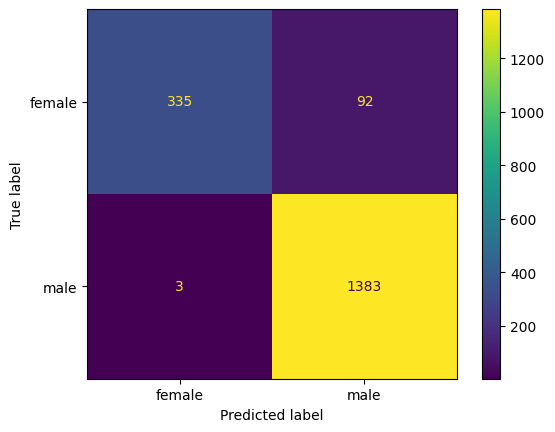

In [36]:
cm_rf=confusion_matrix(labels_test,labels_pred_rf)


labels_pred_rf1=np.array(labels_pred_rf)
labels_pred_rf1=le.fit_transform(labels_pred_rf1)


accuracy_rf = accuracy_score(labels_test, labels_pred_rf) * 100
error_rf = log_loss(labels_test1,labels_pred_rf1)
F1_score_rf = f1_score(labels_test, labels_pred_rf ,pos_label="male") * 100
recall_rf = recall_score(labels_test, labels_pred_rf,pos_label="male")* 100
precision_rf = precision_score(labels_test, labels_pred_rf,pos_label="male") * 100

print("Accuracy of Random Forest Classifier: {:.2f} % ".format(accuracy_rf))
print("Error of Random Forest Classifier: {:.2f} % " .format(error_rf))
print("F1-score of Random Forest Classifier: {:.2f} %".format(F1_score_rf))
print("Recall of Random Forest Classifier: {:.2f} %".format(recall_rf))
print("Percision of Random Forest Classifier: {:.2f} %".format(precision_rf))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf,
                               display_labels=rnd_clf.classes_)
disp.plot()
print(confusion_matrix)

#***Boosting***

In [37]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(min_samples_leaf = 10), n_estimators=200,random_state=42)
ada_clf.fit(features_train, labels_train)
labels_pred_ada = ada_clf.predict(features_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of Boosted Desicion Tree Classifier: 93.93 % 
Error of Boosted Desicion Tree Classifier: 2.19 % 
F1-score of Boosted Desicion Tree Classifier: 96.08 % 
Recall of Boosted Desicion Tree Classifier: 97.33 %
Percision of Boosted Desicion Tree Classifier: 94.87 % 
<function confusion_matrix at 0x7bef1f884280>


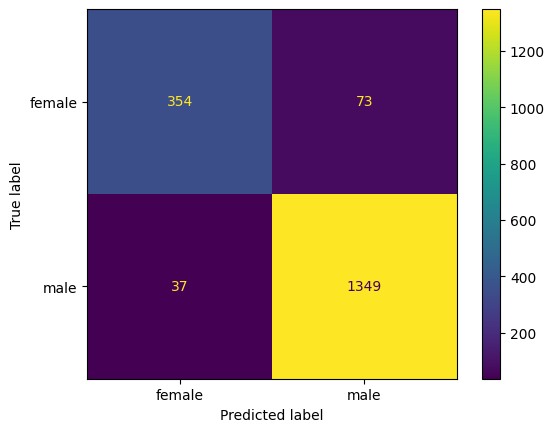

In [38]:
cm_ada=confusion_matrix(labels_test,labels_pred_ada)


labels_pred_ada1=np.array(labels_pred_ada)
labels_pred_ada1=le.fit_transform(labels_pred_ada1)


accuracy_ada = accuracy_score(labels_test, labels_pred_ada) * 100
error_ada = log_loss(labels_test1,labels_pred_ada1)
F1_score_ada = f1_score(labels_test, labels_pred_ada ,pos_label="male") * 100
recall_ada = recall_score(labels_test, labels_pred_ada,pos_label="male")* 100
precision_ada = precision_score(labels_test, labels_pred_ada,pos_label="male") * 100

print("Accuracy of Boosted Desicion Tree Classifier: {:.2f} % ".format(accuracy_ada))
print("Error of Boosted Desicion Tree Classifier: {:.2f} % " .format(error_ada))
print("F1-score of Boosted Desicion Tree Classifier: {:.2f} % ".format(F1_score_ada))
print("Recall of Boosted Desicion Tree Classifier: {:.2f} %".format(recall_ada))
print("Percision of Boosted Desicion Tree Classifier: {:.2f} % ".format(precision_ada))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada,
                               display_labels=ada_clf.classes_)
disp.plot()
print(confusion_matrix)


#Comparison

Comparing Normalized SVM with Normalized KNN:

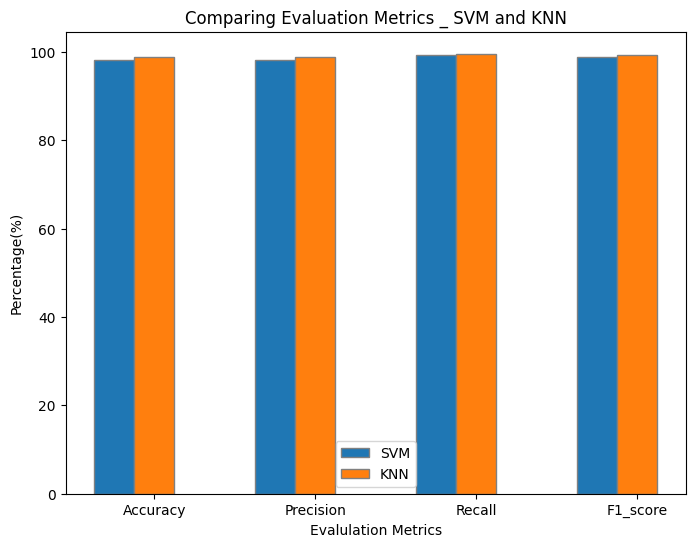

In [58]:
SVM_model = [accuracy_svm_n, precision_svm_n,recall_svm_n, F1_score_svm_n]
knn_model = [accuracy_knn_n, precision_knn_n,recall_knn_n, F1_score_knn_n]

barWidth = 0.25
fig = plt.subplots(figsize =(8,6))

br1 = np.arange(len(SVM_model))
br2 = [x + barWidth for x in br1]

plt.bar(br1, SVM_model, width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br2, knn_model, width = barWidth,
        edgecolor ='grey', label ='KNN')

plt.xlabel('Evalulation Metrics')
plt.ylabel('Percentage(%)')
plt.xticks([r + barWidth for r in range(len(SVM_model))],
        ['Accuracy', 'Precision', 'Recall', 'F1_score'])

plt.title('Comparing Evaluation Metrics _ SVM and KNN')

plt.legend()
plt.show()




In [40]:
classifiers = ['SVM_classifier','KNN_classifier']

In [41]:
errors = [error_svm_n,error_knn_n]

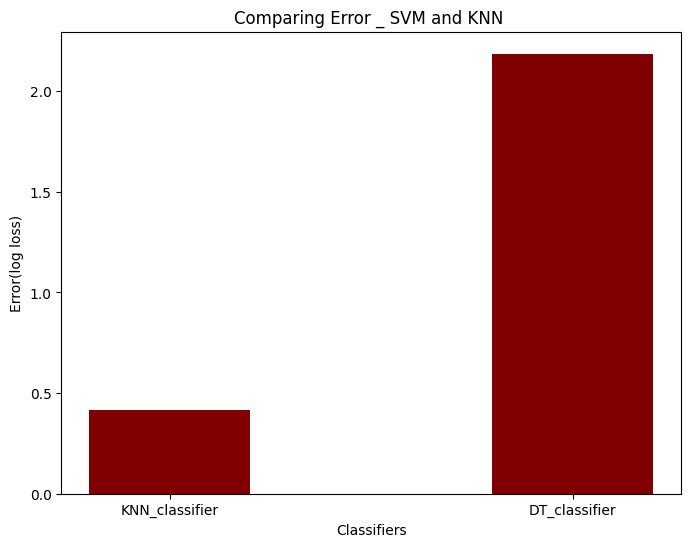

In [59]:
fig = plt.figure(figsize = (8,6))

plt.bar(classifiers, errors, color ='maroon', width = 0.4)

plt.title('Comparing Error _ SVM and KNN ')
plt.xlabel("Classifiers")
plt.ylabel("Error(log loss)")
plt.show()

Comparing normalized SVM with boosted desicion tree

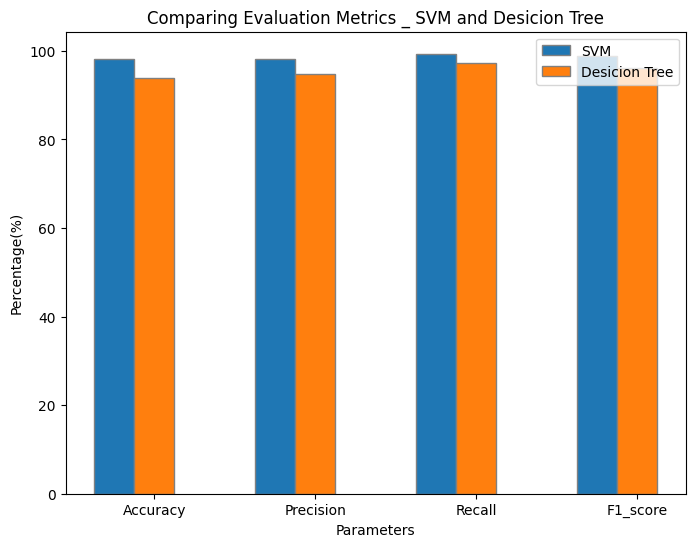

In [62]:
SVM_model = [accuracy_svm_n, precision_svm_n,recall_svm_n, F1_score_svm_n]
DT_model = [accuracy_ada, precision_ada,recall_ada, F1_score_ada]

barWidth = 0.25
fig = plt.subplots(figsize =(8,6))

br1 = np.arange(len(SVM_model))
br2 = [x + barWidth for x in br1]

plt.bar(br1, SVM_model, width = barWidth,
        edgecolor ='grey', label ='SVM')
plt.bar(br2, DT_model, width = barWidth,
        edgecolor ='grey', label ='Desicion Tree')

plt.xlabel('Parameters')
plt.ylabel('Percentage(%)')
plt.xticks([r + barWidth for r in range(len(SVM_model))],
        ['Accuracy', 'Precision', 'Recall', 'F1_score'])
plt.title('Comparing Evaluation Metrics _ SVM and Desicion Tree')

plt.legend()
plt.show()

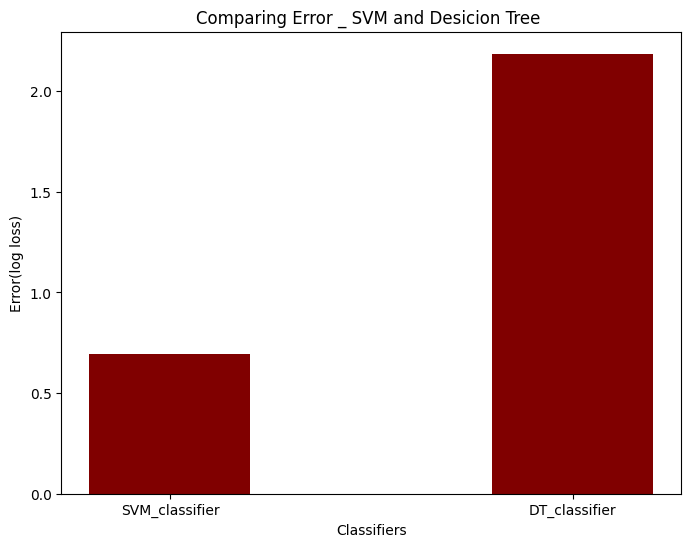

In [60]:
classifiers = ['SVM_classifier','DT_classifier']
errors = [error_svm_n,error_ada]
fig = plt.figure(figsize = (8,6))

plt.bar(classifiers, errors, color ='maroon', width = 0.4)

plt.title('Comparing Error _ SVM and Desicion Tree ')
plt.xlabel("Classifiers")
plt.ylabel("Error(log loss)")
plt.show()

Comparing normalized knn with boosted desicion tree:

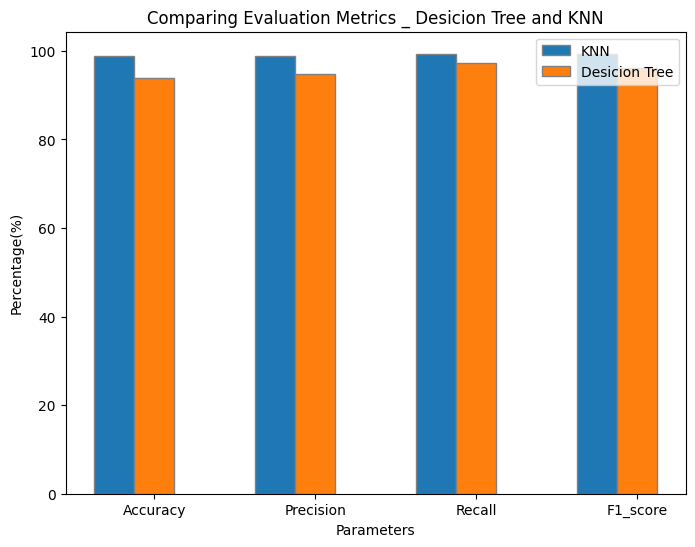

In [63]:
KNN_model = [accuracy_knn_n, precision_knn_n,recall_svm_n, F1_score_knn_n]
DT_model = [accuracy_ada, precision_ada,recall_ada, F1_score_ada]

barWidth = 0.25
fig = plt.subplots(figsize =(8,6))

br1 = np.arange(len(KNN_model))
br2 = [x + barWidth for x in br1]

plt.bar(br1, KNN_model, width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, DT_model, width = barWidth,
        edgecolor ='grey', label ='Desicion Tree')

plt.xlabel('Parameters')
plt.ylabel('Percentage(%)')
plt.xticks([r + barWidth for r in range(len(KNN_model))],
        ['Accuracy', 'Precision', 'Recall', 'F1_score'])

plt.title('Comparing Evaluation Metrics _ Desicion Tree and KNN')

plt.legend()
plt.show()

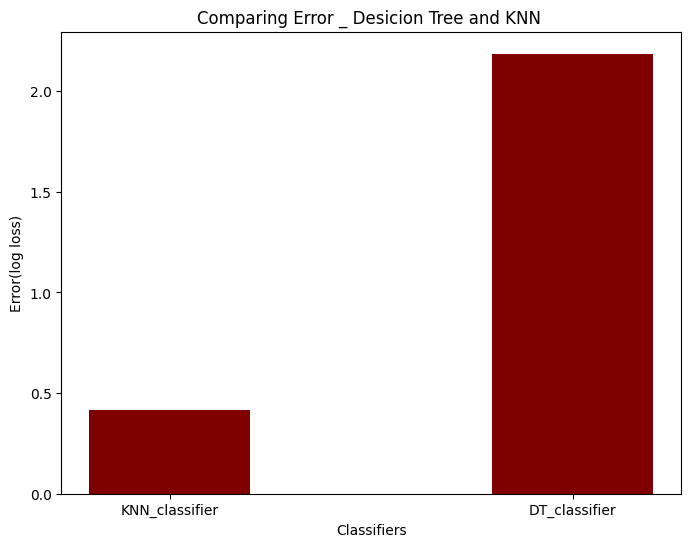

In [61]:
classifiers = ['KNN_classifier','DT_classifier']
errors = [error_knn_n,error_ada]
fig = plt.figure(figsize = (8,6))

plt.bar(classifiers, errors, color ='maroon', width = 0.4)

plt.title('Comparing Error _ Desicion Tree and KNN ')
plt.xlabel("Classifiers")
plt.ylabel("Error(log loss)")
plt.show()